# E8. Branch and bound algorithm for integer programming

## Code of the algorithm

In [11]:
import pandas as pd
import heapq
import matplotlib.pyplot as plt

In [12]:
def bound(level, profit, weight, W, n, profits, weights):
    if weight >= W:
        return 0
    profit_bound = profit
    j = level + 1
    total_weight = weight

    while (j < n and total_weight + weights[j] <= W):
        total_weight += weights[j]
        profit_bound += profits[j]
        j += 1

    if j < n:
        profit_bound += (W - total_weight) * profits[j] / weights[j]

    return profit_bound

def branch_and_bound(n, W, profits, weights):
    max_profit = 0
    best_set = []
    Q = []
    heapq.heappush(Q, (-0, -1, 0, 0, []))

    while Q:
        current = heapq.heappop(Q)
        current_bound = -current[0]
        level = current[1]
        current_profit = current[2]
        current_weight = current[3]
        include = current[4]

        if level == n - 1:
            continue

        next_level = level + 1

        next_weight = current_weight + weights[next_level]
        next_profit = current_profit + profits[next_level]
        next_include = include + [1]

        if next_weight <= W and next_profit > max_profit:
            max_profit = next_profit
            best_set = next_include

        next_bound = bound(next_level, next_profit, next_weight, W, n, profits, weights)
        if next_bound > max_profit:
            heapq.heappush(Q, (-next_bound, next_level, next_profit, next_weight, next_include))

        next_include = include + [0]
        next_bound = bound(next_level, current_profit, current_weight, W, n, profits, weights)
        if next_bound > max_profit:
            heapq.heappush(Q, (-next_bound, next_level, current_profit, current_weight, next_include))

    return best_set, max_profit


## Code for the graphical part

In [13]:
def plot_results(df, best_set):
    df['Selected'] = best_set
    colors = ['blue' if x == 1 else 'gray' for x in df['Selected']]
    
    plt.figure(figsize=(10, 6))
    plt.bar(df['Project'], df['Revenue'], color=colors)
    plt.xlabel('Project')
    plt.ylabel('Revenue')
    plt.title('Project Revenues with Selected Projects Highlighted')
    plt.show()

## Execution of the algorithm 

Selected projects:  [2, 4, 5, 6]
Maximum revenue:  84
Total number of days used:  195


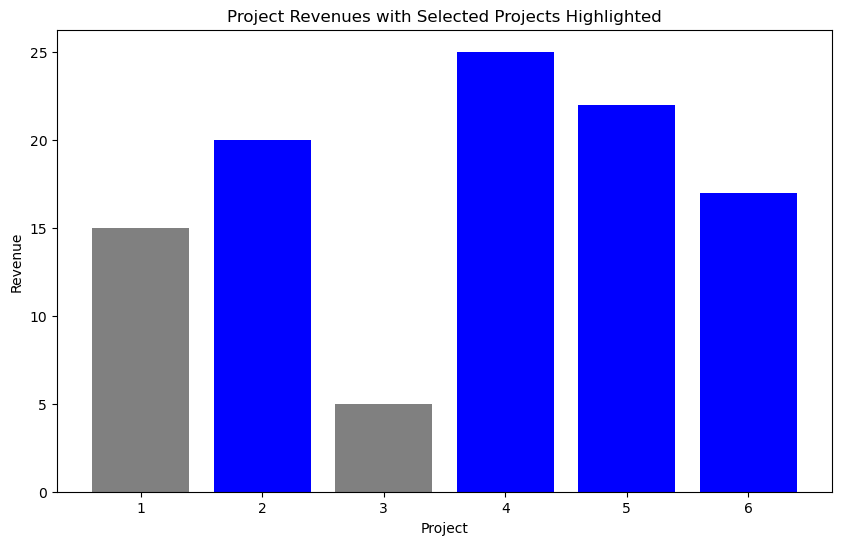

In [18]:
def main():
    df = pd.read_csv(r"C:\Users\Utilisateur\Desktop\ESILV\A3\Optimization\BBAlgoData.csv")
    profits = df['Revenue'].tolist()
    weights = df['Days'].tolist()
    # Here we can change the maximum number of researcher days available
    W = 200  
    n = len(profits)

    best_set, max_profit = branch_and_bound(n, W, profits, weights)
    
    selected_projects = [i+1 for i, x in enumerate(best_set) if x == 1]
    days_used = sum(weights[i] for i, x in enumerate(best_set) if x == 1)
    
    print("Selected projects: ", selected_projects)
    print("Maximum revenue: ", max_profit)
    print("Total number of days used: ", days_used)
    
    plot_results(df, best_set)


if __name__ == "__main__":
    main()